In [1]:
from astropy.io import fits
from astropy.io.fits import getheader
import numpy as np
import matplotlib.pyplot as plt
import photutils
import pandas as pd
from astropy.table import Table
import statistics

In [2]:
Photometric = fits.open('/astro/users/chrism99/Desktop/LJ/Galaxy_Orientation/manga-pymorph-DR15.fits')
Morphologic = fits.open('/astro/users/chrism99/Desktop/LJ/Galaxy_Orientation/manga-morphology-dl-DR15.fits')
Photometric

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb4c0ea36a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb4c0e24e80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb4c0e38ba8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb4c0e4e940>]

In [3]:
#Photometric.info()

In [4]:
#Photometric[3].data

In [5]:
#a = np.array([1, 2, 3, 4])
#b = np.array([False, False, False, True])
#b = a == 4
#a[b]
#a == 4

In [6]:
#Morphologic[1].data[Morphologic[1].data['MANGA-ID'] == '1-286558'][0]

In [7]:
#test = []
#for i in Morphologic[1].data[Morphologic[1].data['MANGA-ID'] == '1-286558'][0]:
#    test.append(i)
#test.extend([100])
#test

In [3]:
Morph_cols = ['MANGA-ID', 'TType', 'P_S0', 'P_edge_on', 'P_bar_N10', 'P_merg', 'P_bulge', 'P_cigar']
Phot_cols = ['MANGA_ID', 'RA', 'DEC', 'Z', 'EXTINCTION', 'FLAG_FIT', 'FLAG_FAILED_S', 'M_S', 'M_S_ERR', 'BA_S', 'BA_S_ERR', 'PA_S', 'PA_S_ERR']
Aggregate = []
for id in Morphologic[1].data['MANGA-ID']:
    morphRow = Morphologic[1].data[Morphologic[1].data['MANGA-ID'] == id]
    morphRowList = [i for i in morphRow[0]]
    morphRowList = [morphRow[key] for key in Morph_cols]
    photRow = Photometric[2].data[Photometric[2].data['MANGA_ID'] == id]
    photRowList = [i for i in photRow[0]]
    photRowList = [photRow[key] for key in Phot_cols]
    morphRowList.extend(photRowList)
    Aggregate.append(morphRowList)
Aggregate = np.array(Aggregate)

In [9]:
#Inclination = [np.arccos(np.absolute(((((Aggregate[:,17][i][0])**2) - 0.0196)/0.9804)**(1/2))) for i in range(len(Aggregate[:,17]))]

In [7]:
Mag = [Aggregate[:,15][i][0] for i in range(len(Aggregate[:,15]))]
P_Edge_On = [Aggregate[:,3][i][0] for i in range(len(Aggregate[:,3]))]
TType = [Aggregate[:,1][i][0] for i in range(len(Aggregate[:,19]))]
RA = [Aggregate[:,9][i][0] for i in range(len(Aggregate[:,19]))]
DEC = [Aggregate[:,10][i][0] for i in range(len(Aggregate[:,19]))]
Z = [Aggregate[:,11][i][0] for i in range(len(Aggregate[:,19]))]
PosAngle = [Aggregate[:,19][i][0]*np.pi/180 for i in range(len(Aggregate[:,19]))]
Inclination = [np.arccos(np.absolute(((((Aggregate[:,17][i][0])**2) - 0.0196)/0.9804)**(1/2))) for i in range(len(Aggregate[:,17]))]

/astro/classes/Astro_300/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
/astro/classes/Astro_300/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [11]:
#Aggregate[:,1]

In [12]:
#for value in Aggregate:
#    print(value[2][0])
    

In [13]:
#z_vals = np.loadtxt('/astro/users/chrism99/Desktop/LJ/ra_vals')
#print(ra_vals.mean())
#print(ra_vals.max())
#print(ra_vals.min())

In [140]:
Aggregate.shape

(2175, 21)

In [34]:
Aggregate[:,1][1402][0]

1.7490084171295166

In [10]:
#Sersic Fit Mask
for i in range(len(Aggregate[:,14])):
    if Aggregate[:,14][i].any() == 1:
        Aggregate = np.delete(Aggregate, [i], 0)

In [13]:
#Lower RA Mask
for i in range(len(Aggregate[:,9])):
    if Aggregate[:,9][i][0] <= 100:
        Aggregate = np.delete(Aggregate, [i], 0)

In [16]:
#Upper RA Mask
for i in range(len(Aggregate[:,9])):
    if Aggregate[:,9][i][0] >= 290:
        Aggregate = np.delete(Aggregate, [i], 0)

In [19]:
#DEC Mask
for i in range(len(Aggregate[:,10])):
    if Aggregate[:,10][i][0] <= 20:
        Aggregate = np.delete(Aggregate, [i], 0)

In [20]:
#Apparent Magnitude Mask
for i in range(len(Aggregate[:,15])):
    if Aggregate[:,15][i][0] <= -200:
        Aggregate = np.delete(Aggregate, [i], 0)

In [26]:
#TType <0 Mask
for i in range(len(Aggregate[:,1])):
    if Aggregate[:,1][i][0] <= 0:
        Aggregate = np.delete(Aggregate, [i], 0)

In [28]:
#TType >7 Mask
for i in range(len(Aggregate[:,1])):
    if Aggregate[:,1][i][0] >= 7:
        Aggregate = np.delete(Aggregate, [i], 0)

In [29]:
Mag = [Aggregate[:,15][i][0] for i in range(len(Aggregate[:,15]))]
P_Edge_On = [Aggregate[:,3][i][0] for i in range(len(Aggregate[:,3]))]
TType = [Aggregate[:,1][i][0] for i in range(len(Aggregate[:,19]))]
RA = [Aggregate[:,9][i][0] for i in range(len(Aggregate[:,19]))]
DEC = [Aggregate[:,10][i][0] for i in range(len(Aggregate[:,19]))]
Z = [Aggregate[:,11][i][0] for i in range(len(Aggregate[:,19]))]
PosAngle = [Aggregate[:,19][i][0]*np.pi/180 for i in range(len(Aggregate[:,19]))]
Inclination = [np.arccos(((np.absolute((((Aggregate[:,17][i][0])**2) - 0.0196)/0.9804))**(1/2))) for i in range(len(Aggregate[:,17]))]

In [38]:
#FitFail = Aggregate[:,14]
#SersicMask = (FitFail == 0)
#above45Mask = Aggregate[:,5].astype(float) > 45
#Aggregate[SersicMask]

##Inclination

In [39]:
#np.logical_or(nonEdgeOnMask, above45Mask)

In [40]:
#cols = Photometric[1].columns
#cols.info

In [41]:
#Inclination = [np.arccos(np.absolute(((((Aggregate[:,17][i][0])**2) - 0.0196)/0.9804)**(1/2))) for i in range(len(Aggregate[:,17]))]

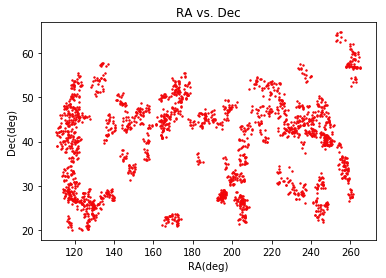

In [42]:
plt.scatter(RA, DEC, edgecolors="r", s=2)
plt.title('RA vs. Dec')
plt.xlabel('RA(deg)')
plt.ylabel('Dec(deg)')
#plt.xlim(-.1,1)
#plt.ylim((-np.pi),(np.pi))
plt.show()

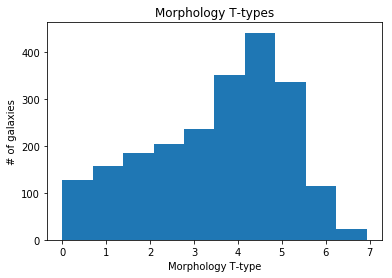

In [43]:
plt.hist(TType)
plt.title('Morphology T-types')
plt.xlabel('Morphology T-type')
plt.ylabel('# of galaxies')
#plt.xlim(-.1,1)
#plt.ylim((-np.pi),(np.pi))
plt.show()

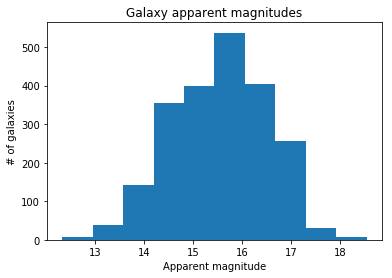

In [44]:
plt.hist(Mag)
plt.title('Galaxy apparent magnitudes')
plt.xlabel('Apparent magnitude')
plt.ylabel('# of galaxies')
#plt.xlim(-.1,1)
#plt.ylim((-np.pi),(np.pi))
plt.show()

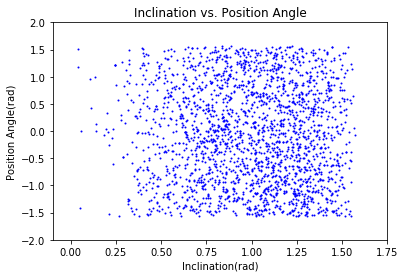

In [45]:
plt.scatter(Inclination, PosAngle, edgecolors="b", s=1)
plt.title('Inclination vs. Position Angle')
plt.xlabel('Inclination(rad)')
plt.ylabel('Position Angle(rad)')
plt.xlim(-.1,1.75)
plt.ylim(-2,2)
plt.show()

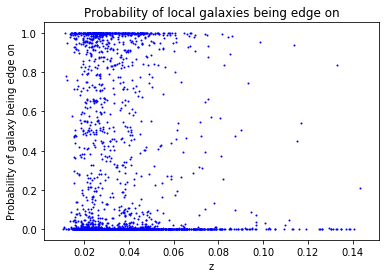

In [46]:
plt.scatter(Z, P_Edge_On, edgecolors="b", s=1)
plt.title('Probability of local galaxies being edge on')
plt.ylabel('Probability of galaxy being edge on')
plt.xlabel('z')
#plt.xlim(-.1,1)
#plt.ylim(-0.1,1.1)
plt.show()

In [180]:
Mag = [Aggregate[:,15][i][0] for i in range(len(Aggregate[:,15]))]
P_Edge_On = [Aggregate[:,3][i][0] for i in range(len(Aggregate[:,3]))]
TType = [Aggregate[:,1][i][0] for i in range(len(Aggregate[:,19]))]
RA = [Aggregate[:,9][i][0] for i in range(len(Aggregate[:,19]))]
DEC = [Aggregate[:,10][i][0] for i in range(len(Aggregate[:,19]))]
Z = [Aggregate[:,11][i][0] for i in range(len(Aggregate[:,19]))]
PosAngle = [Aggregate[:,19][i][0]*np.pi/180 for i in range(len(Aggregate[:,19]))]

In [181]:
PosAngle = [Aggregate[:,19][i][0]*np.pi/180 for i in range(len(Aggregate[:,19]))]

In [19]:
#Angle = [180/np.pi*np.arctan((np.tan(Inclination[i]))**2 + (np.tan(PosAngle[i]))**2) for i in range(len(Aggregate[:,17]))]

In [41]:
Inclination

[1.4469573033609238,
 1.2227181076823157,
 0.7990053846558759,
 0.38086773758755466,
 0.9174877672686348,
 0.9250416423453105,
 0.8980278521659113,
 1.4824918144506332,
 1.1931776966841097,
 0.6303936452202208,
 0.746652698292279,
 0.8341001836306701,
 1.419254333883439,
 0.3123035772505054,
 1.0374686315636363,
 1.2554479138571668,
 1.3040211807824715,
 1.4244739748384305,
 1.0893486395127263,
 1.5474207369138286,
 0.5886790259596161,
 1.4774207701077977,
 1.0202329657211209,
 1.1966681984313656,
 1.413699050803883,
 0.9949016406655009,
 1.3866056350118068,
 1.4000164452989878,
 1.1536386249670032,
 1.1622896209753446,
 nan,
 0.9223111832375197,
 1.1349980053577913,
 0.7797060997705305,
 0.8601471099140496,
 0.8214908948136396,
 0.8574172621049035,
 1.1804868912257152,
 0.7398136655522363,
 0.835075140578325,
 0.6230517461605382,
 0.9187929642782017,
 1.0492448264737166,
 1.1239380913440762,
 1.210042981425086,
 0.7946829110977623,
 1.427044145650102,
 0.37084900301512014,
 1.50169734

In [145]:
#for i,j in range(len(Aggregate[:,14])):
#    print((Angle[i] - Angle[j]).sum())

TypeError: 'int' object is not iterable

In [47]:
d = {'theta': Inclination, 'phi': PosAngle, 'ra': RA, 'dec': DEC, 'z': Z}
df = pd.DataFrame(data = d)

comps = dict()
for ind in df.index:
    cur_CORRELATION = list()
    cur_theta = df.iloc[ind]['theta']
    cur_phi = df.iloc[ind]['phi']
    cur_ra = df.iloc[ind]['ra']
    cur_dec = df.iloc[ind]['dec']
    cur_z = df.iloc[ind]['z']
    for j in df.index:
        if j != ind:
            comp_theta = df.iloc[j]['theta']
            comp_phi = df.iloc[j]['phi']
            comp_ra = df.iloc[j]['ra']
            comp_dec = df.iloc[j]['dec']
            comp_z = df.iloc[j]['z']

            THETA = (np.arctan((np.tan(comp_theta - cur_theta))**2 + (np.tan(comp_phi - cur_phi))**2))*180/np.pi
            R = ((cur_z)**2 + (comp_z)**2 + 2*cur_z*comp_z*(np.sin(cur_ra)*np.sin(comp_ra)*np.cos(cur_dec - comp_dec) + np.cos(cur_ra)*np.cos(comp_ra)))**(1/2)
            CORRELATION = (90-THETA)/(R**4)
            cur_CORRELATION.append(CORRELATION)
            cur_CORRELATION
    sum = np.sum(cur_CORRELATION)
    print(sum)
    comps[ind] = sum
              
    

1995448135976.98
127323233624.46352
6079777574927.842
488732805678.27277
133705344663.87311
2834403840.17127
1604757605486.148
2177609125105.6333
120729654486.43498
597649363128.5192
32539562153708.793
1066630071159.7732
4863135140705.809
36915394538.588005
49659313722.64351
84286747293.45895
1890769859322.4536
3812028909332.8076
39840478953144.83
3104928531606.034
1682154289457.644
2211818290364.4116
1794088694643915.0
95813040323320.6
339222694217.9094
1588109930.1760612
3110635906385.387
3173648409222.0596
13181548262.78944
1708953934760.9827
653276991667.0222
1303777529726.2795
19086427946408.234
308068931226.08673
720176941412.2402
1188865983491.7537
311711474799800.3
3360925392818.1743
16845552552.583305
156924100377.1447
1861668895814.207
2683203332842.034
160791335628.59766
10459506635.311203
727988707493.9377
1740727389282.6572
653302400804.4355
1321383730411.9795
484585928418.1673
3279017215536.953
516955154371.95667
738881265546.0234
92253690619770.36
34479839528685.2
511752

3931092293297.962
146616086520.93958
2711885299891.7495
31175411997.38231
536149805168.0595
1184956642289.262
240506553030.0165
1421867909186.2432
403177779898.4386
78025869405.12704
288803698965.994
93579414726917.56
559605880274.6243
23473919935.32058
34116133487.746277
472265586503539.6
394362218716.1777
6703425982835.178
3218186546.8846626
164277228515.9006
727419830128.9609
31856510430.892708
360401868314.78577
74841565773.50394
172464162518.66232
34590890543596.92
87543305200.58682
82774000604.6525
1397723884467.3083
5855035478.129471
2537291703221.7695
4608974606505.171
3061753516.3932357
115387399550.40948
111206372076.12947
13476165109431.934
37879819630.82959
3142144620768.8184
1448675481939.5928
91674216924998.53
1527854765857.5122
405727569115.78357
3673537825599.248
5562346762910.016
461202910699.6862
3843213799092.9355
2384581032000.698
1975769693927.5508
29376730281734.664
572635682633.2205
78637437958809.72
4596287580464.962
116776622045.289
1489058515540.473
3391896482

1438155059904.7668
1337417683331.4746
2245943268016305.0
150685311566.12543
2031883233175267.0
10846085604.622631
407397337.83301497
13356725241601.78
1992349487660.157
255657191148.7356
1547378026606.9941
4784448980300.519
9425231593034.299
23700588648.709057
912093693165.2754
1634190019117023.8
42395365505.795135
287273317861.2228
2243329392776.291
20556904378645.17
3272460508676.365
9386815910513.96
1561754903696.6323
542030946315.8557
7543818393164.252
984813406846.9209
1426705545.2751436
1155639151527.5833
3314959637.476145
87878067900.0332
21234676922.97707
196070813221.13892
7552083893936.702
526133648563.12463
240193414628.05328
149073489856.59222
858546846146.3083
601533821814.2251
143886073648.5286
2186489309750.688
19997349085197.863
8464464434691.367
38263842828556.07
214272049893.68054
12228027015961.57
1946898911477.783
77260238068095.5
13247307428833.15
795693832155.5728
12128698508.90562
1659629622906.5786
332956880604.1504
1987573081110.6143
15772332687070.924
22763806

2220556939379.6274
444585570117.04736
11425737860732.223
3740595344527.2217
75757247868.76596
1143048174258.0889
435045681807.344
963168868707.991
7814329993287.185
2071877620092.6108
83337613513623.31
565421754195.5762
12035188923306.094
27599276224197.227
6094389771.864037
45622247597424.53
2522370316787.3115
182969522881.5505
46539570985837.19
1207485485840.9587
1683534108400.9375
208812319849.15414
3102825720000.953
43190565360.493904
1646580969876.8718
50097338785.42324
1352877548523.134
2198049735811.6304
144630190174563.8
1266905468646.8477
336488415823.9026
52680463571989.3
728868405595.4729
786061656.5170481
652943482.8452258
2048682929167.2803
505195091099.10693
621238811999.7639
3076080368135.389
477307602.0897962
9200627182.344883
27809998348917.477
1939616918262.902
1709574491007.5574
20054662896.62511
4927386480737.957
16428116384003.797
2011728815133.1924
3166505323043.807
662511640428.2139
97058445618776.6
4179763263700.8647
987633826412.8267
894813473747.4163
273689478

1640214882315.4985
417032872220.229
1029939032057.7766
3472357589015.507
2807396200469.667
33347042423.33181
3689353713892.8423
648128923398.7887
19768314857.327744
2050849516816.5334
10614790506548.652
1251925855651.1084
6072676052.746395
5305582111.507643
2317376379056.3604
959416825831.9182
2783599597994.74
200271848989740.0
1133473369428.2358
843042166642.5742
18641657104.310127
10284544194276.145
1899483292059.5376
4425328127078.022
2226424867619.4585
538430569420.2259
6432037211918.271
57178129426217.75
310985222022.70685
1218624908201.2505
423624167655.499
37574605332973.74
34805420780667.79
684743665118.4944
1017359753546.4651
1381452368980.1904
205779089815.5072
2005268195795.9941
9865433727728.533
1501762944.2171414
25932962354.32242
231727421995.79517
115086423393.61896
535717643270.46674
1190625535801.762
5790965480334.635
493727887046.1897
77893886919.8807
78235178443.5242
172610010233.4428
537403375320.12195
638830270854.6859
1704022357939.416
2802764485628.0103
758766924

In [48]:
max_value = statistics.median(comps.values())
##this be a list of the keys with the max values list could have just one element though
max_keys = [k for k, v in comps.items() if v == max_value]
for key in max_keys:
    print(df.iloc[key])
#Angle = [180/np.pi*np.arctan((np.tan(Inclination[i]))**2 + (np.tan(PosAngle[i]))**2) for i in range(len(Aggregate[:,17]))]


theta      1.167661
phi       -1.488347
ra       146.833870
dec       46.610097
z          0.015705
Name: 1201, dtype: float64


In [62]:
Aggregate[:,8][997][0]

'1-523239'

In [52]:
Inclination[997]
RA[1201]
PosAngle[997]

0.5801107876136713

In [130]:
d = {'theta': Inclination, 'phi': PosAngle, 'ra': RA, 'dec': DEC, 'z': Z}
df = pd.DataFrame(data = d)

comps = dict()
cur_CORRELATION = list()
cur_THETA = list()
cur_R = list()
cur_theta = Inclination[997]
cur_phi = PosAngle[997]
cur_ra = RA[997]
cur_dec = DEC[997]
cur_z = Z[997]
for j in df.index:
    if j != 997:
        comp_theta = df.iloc[j]['theta']
        comp_phi = df.iloc[j]['phi']
        comp_ra = df.iloc[j]['ra']
        comp_dec = df.iloc[j]['dec']
        comp_z = df.iloc[j]['z']

        THETA = (np.arctan((np.tan(comp_theta - cur_theta))**2 + (np.tan(comp_phi - cur_phi))**2))*180/np.pi
        R = ((cur_z)**2 + (comp_z)**2 + 2*cur_z*comp_z*(np.sin(cur_ra)*np.sin(comp_ra)*np.cos(cur_dec - comp_dec) + np.cos(cur_ra)*np.cos(comp_ra)))**(1/2)
        CORRELATION = (90-THETA)/(R**4)
        cur_CORRELATION.append(CORRELATION)
        cur_THETA.append(THETA)
        cur_R.append(R)
        cur_CORRELATION
        cur_THETA
        cur_R
    print(CORRELATION)
    comps[997] = CORRELATION
    #average = np.sum(cur_R)/2175
    #print(average)
    #comps[ind] = average
              

16228.582148214891
70456.76931936282
70217.01120929373
11874.357969145838
9185.447407111644
3687.5345743134535
55096.118981741354
12556.081688359978
147481.05563755843
15264.706332308508
193005.0430370579
13195.955372376346
22153.700812209794
25949.13286311251
239086.35942996788
14191.462365390875
18416.691900364636
25772.490743411003
14169.132149031844
474.16514235058867
81700.05620344749
15825.543182981904
5897.300123029915
46479.01879276552
24941.78569502329
129285.94248849095
20970.22755267397
84178.34960053682
695741.8063688161
115543.7441256106
21767.45684232314
9195.787129771832
91947.00537598562
149431.79674801845
718.6594322832741
417.453620687244
6625.891240145851
77091.87991977042
5777.968471424989
280410.3798961425
214691.10465529995
143934.28185993683
14716.987364943734
12834.986593914364
18989.134354772505
172664.3126488166
3847.5357486600055
2.4162366244012468
7051.801351438527
8963.496084161783
5023.495894323693
27.38629537306188
23689.421366792707
73526.91625067023
470

81056.05605946355
69655.5896137089
133692.42852271575
23281.624951621256
49699.44660519296
32120.13300584972
72255.74768306508
126710.01093512379
51784.42806274165
31077469.106316835
129333.51935648546
17813.422994477234
9743.459271932634
61251.8108383892
7786.427944720974
30957.713406890438
281.05090217315285
100042.45345542284
14287.454412646966
11228.893865414311
75465.43372562136
31942.64210325974
2116.5882271649493
21044.757114165826
208706.51664798878
123435.98602146684
42649.16079800119
73696.63196758842
113613.54501808442
91316.02123534412
512.4936899319806
74642.01091050931
16638.963679384044
65448.925796817275
209.4412502158229
28231.647914347755
5019.946456845975
12941.165135989393
6050.5462516379885
128393.70618474735
695.2699503717756
120879.49775530217
2088.3758495356683
212804.34384719547
294696.4198811605
260321.41122577095
86163.01060468149
43737.95275739904
32657.385303167637
11576.554830849294
71093.67422143674
92455.57421693997
96190.85669582983
115531.34899780323
1

416123.2943930493
155393.76930491425
37397.01103530239
23713.11201907436
613.5776502193386
123933.13014093015
33342.36423214427
143066.96257839154
259081.85726383972
4796.478247825142
797270.6039094998
3572.132588694677
22363.693250085613
435.1840715752072
117237.98240815425
183898.82339956006
12425.41677964638
175220.57753836506
31325.263190064874
17719.23329449012
25148.49752009154
43823.67926117512
46701.46013099987
63729.884925263155
168818.96195812555
95340.19590516851
29921.21570527689
123933.13014093015
1740.1352762441404
328.8411009107231
4236.454473506118
102229.99934995857
786.9643469687185
53610.604202006965
1425.2900240470976
3.66407923026658
6171.4369634588065
23826.101479733654
332362.15004692023
120.06713278803595
1061.2331990653706
239637.6818753378
224.64505140085413
20472.24065299538
128963.60154676254
94830.42134532798
35180.84929809079
10986.60854975542
75395.88223971575
364.58655087337206
2691.0210143699546
15103.04058201577
354335.6537021186
82387.43398782381
1397

In [36]:
R_vals_1402 = np.loadtxt('/astro/users/chrism99/Desktop/LJ//Galaxy_Orientation/R_values_1402')
THETA_vals_1402 = np.loadtxt('/astro/users/chrism99/Desktop/LJ//Galaxy_Orientation/theta_values_1402')
COR_vals_997 = np.loadtxt('/astro/users/chrism99/Desktop/LJ//Galaxy_Orientation/corr_values_997')
print(sum(COR_vals_997))

203864126.29575536


NameError: name 'x' is not defined

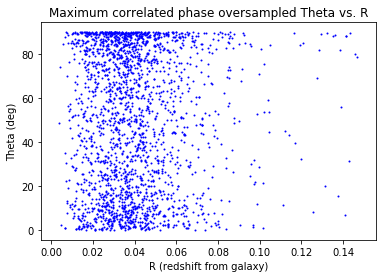

In [139]:
plt.scatter(R_vals_1201, THETA_vals_1201, edgecolors="b", s=1)#np.cos(THETA_vals_1201*np.pi/180))
plt.title('Maximum correlated phase oversampled Theta vs. R')
plt.xlabel('R (redshift from galaxy)')
plt.ylabel('Theta (deg)')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#plt.xlim(-.1,1.75)
#plt.ylim(-2,2)
plt.show()

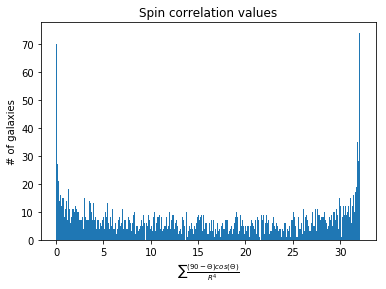

In [128]:
a = plt.hist(THETA_vals_1402*np.cos(THETA_vals_1402*np.pi/180), bins=300)
y_pos = np.arange(len(THETA_vals_1402))
plt.title('Spin correlation values')
plt.xlabel(r'$\sum\frac{(90-\Theta)cos(\Theta)}{R^4}$')
plt.ylabel('# of galaxies')
#plt.xlim(-10000000000000,1200000000000000)
plt.show()

In [39]:
a = plt.hist(z_vals, bins=300)
plt.title('Aggregate z-values')
plt.xlabel('z')
plt.ylabel('# of galaxies')

NameError: name 'z_vals' is not defined